In [1]:
!pip install unrar

In [2]:
!sudo apt-get install unrar
!unrar x imageOriginal.rar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  unrar
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 129 kB of archives.
After this operation, 322 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/multiverse amd64 unrar amd64 1:5.5.8-1 [129 kB]
Fetched 129 kB in 1s (243 kB/s)
debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package unrar.
(Reading database ... 22496 files and directories currently installed.)
Preparing to unpack .../unrar_1%3a5.5.8-1_amd64.deb ...
Unpacking unrar (1:5.5.8-1) ...
Setting up unrar (1:5.5.8-1) ...
update-alternatives: using /usr/bin/unrar-nonfree to provide /usr/bin/unrar (unrar) in auto mode
update-alternatives: warning: skip creation of /usr/share/man/man1/unrar.1.gz because associated file /usr/share/man/man1/unrar-nonfree.1.gz (of link 

In [88]:
!pip install keras
!pip install tensorflow
!pip install -U scikit-learn
!pip install seaborn

     |████████████████████████████████| 288 kB 20.5 MB/s eta 0:00:01


# load the data and plot 5 images from each class

['bowling bin', 't-shirt', 'racket', 'baseball bat', 'BoxingGloves', 'Football Helmets', 'whistle', 'sport shoes', 'baseballGloves', 'Dumbbell', 'ball']


/tmp/ipykernel_944/3040971795.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train = np.array(x_train)
/tmp/ipykernel_944/3040971795.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test = np.array(x_test)
/tmp/ipykernel_944/3040971795.py:104: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_val = np.array(x_val)


Total time is : 2.1848807334899902
########################################## Class Number :  0  ##########################################


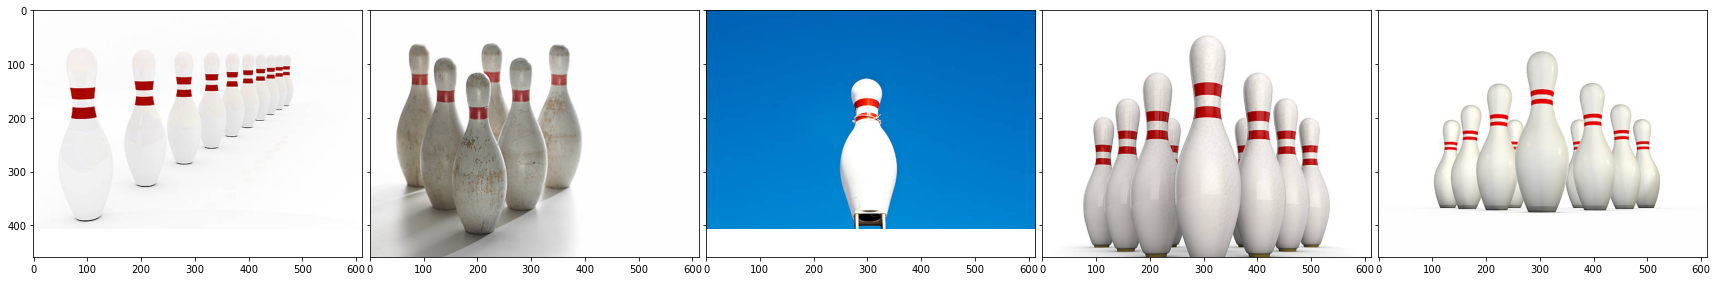

########################################## Class Number :  1  ##########################################


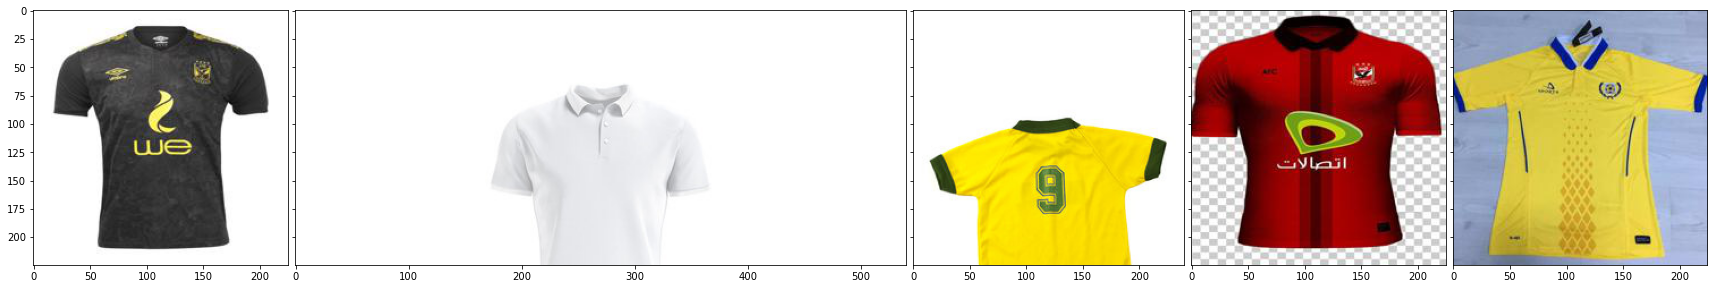

########################################## Class Number :  2  ##########################################


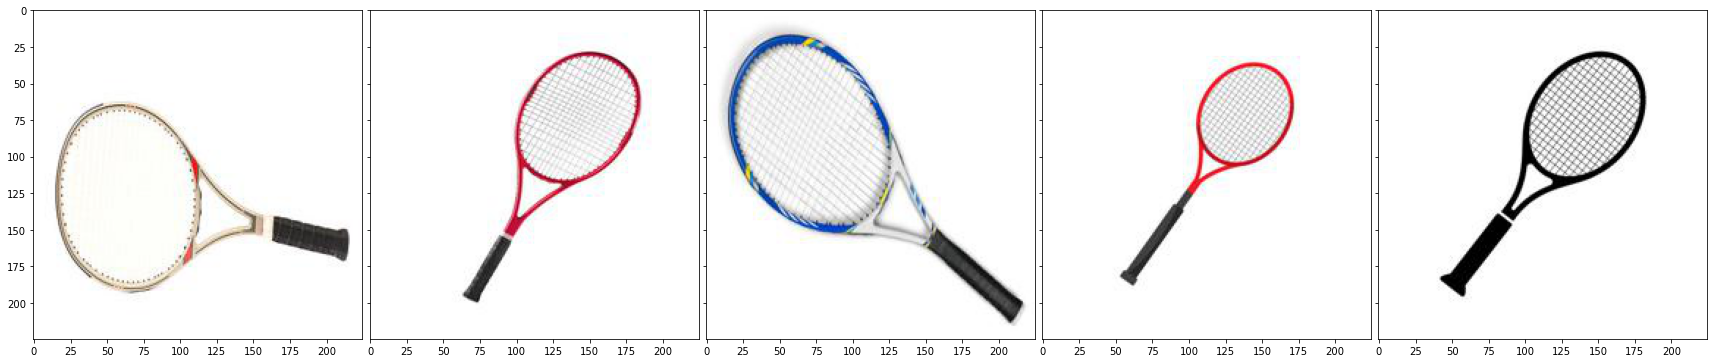

########################################## Class Number :  3  ##########################################


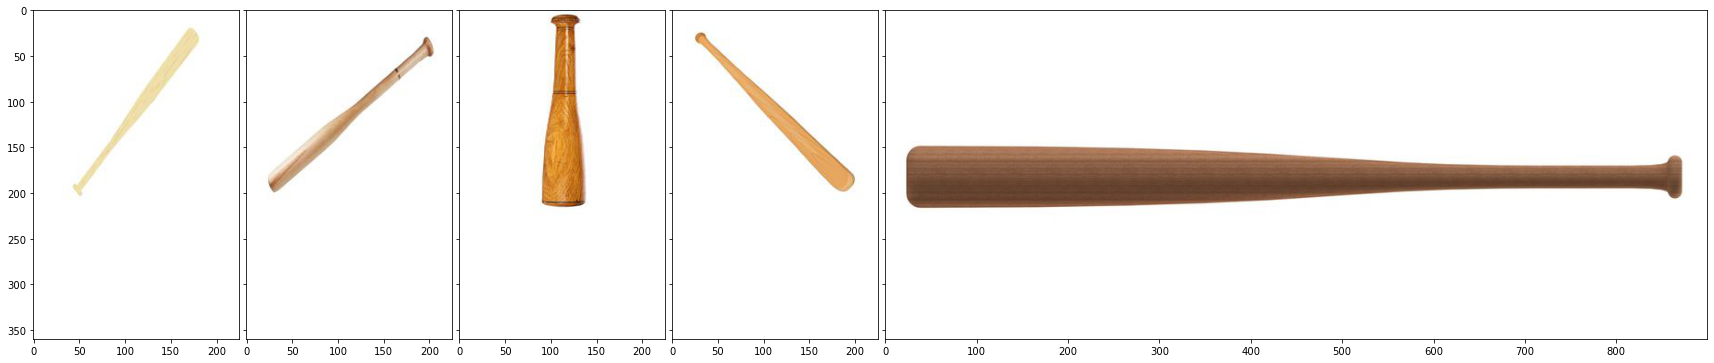

########################################## Class Number :  4  ##########################################


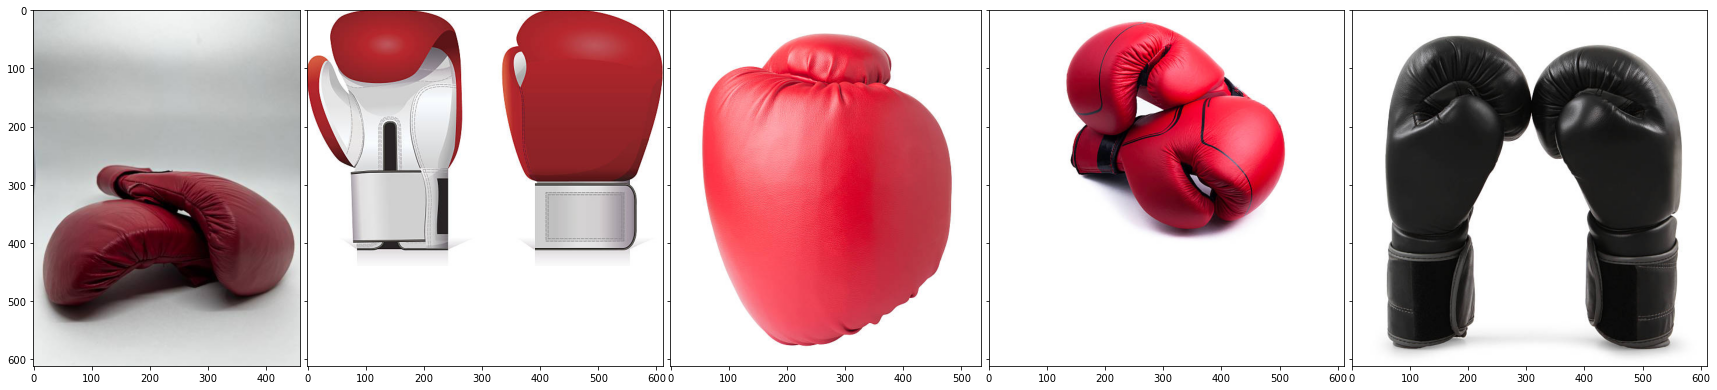

########################################## Class Number :  5  ##########################################


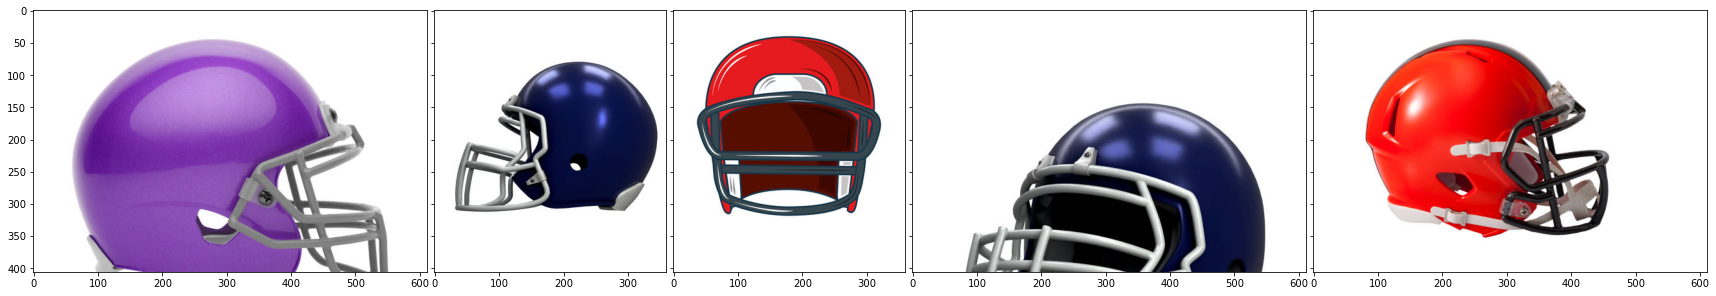

########################################## Class Number :  6  ##########################################


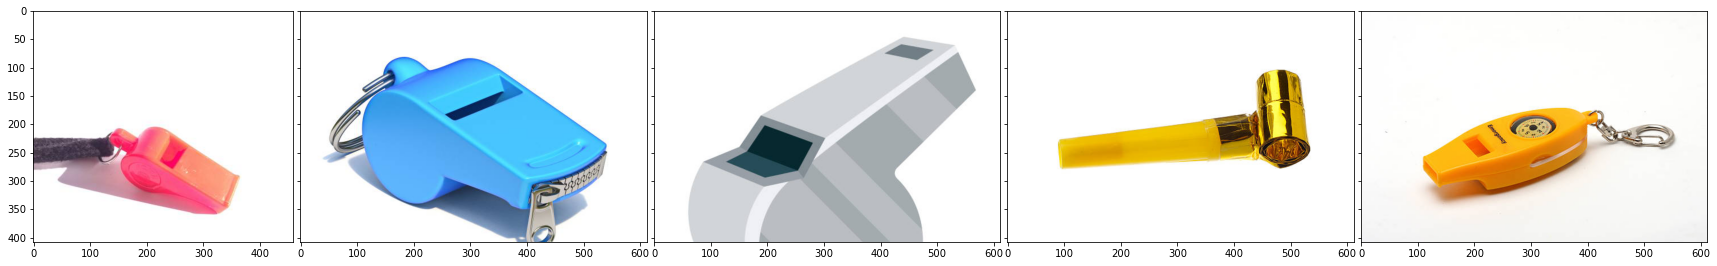

########################################## Class Number :  7  ##########################################


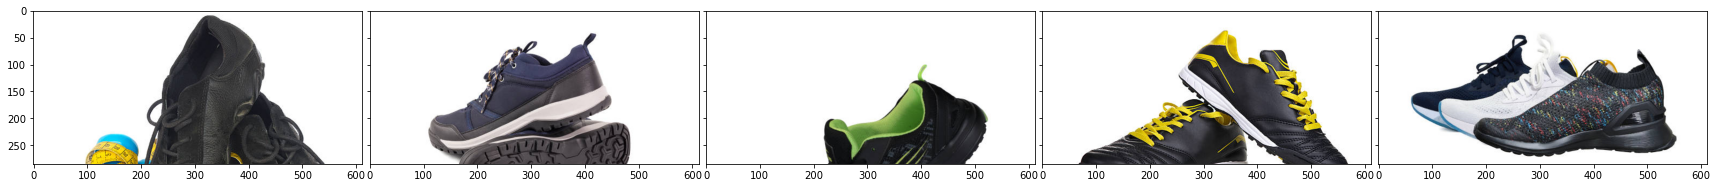

########################################## Class Number :  8  ##########################################


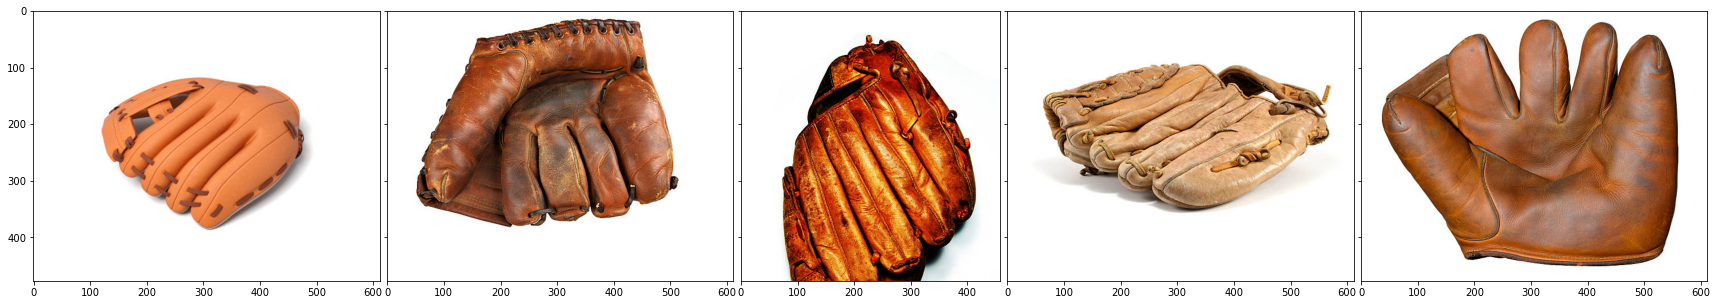

########################################## Class Number :  9  ##########################################


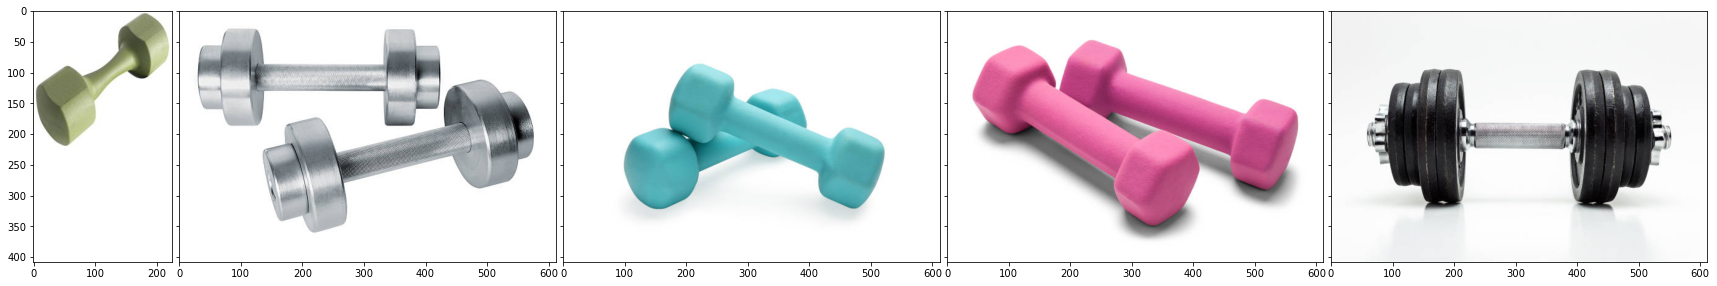

########################################## Class Number :  10  ##########################################


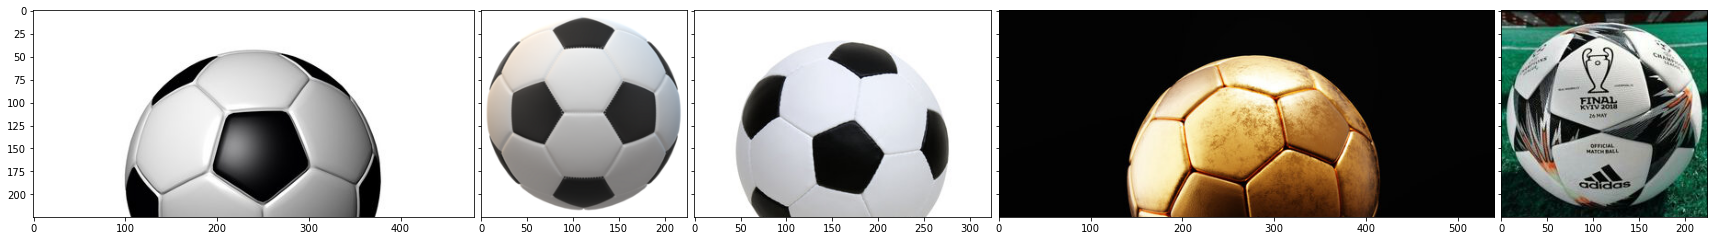

Total time is : 7.462991714477539


In [142]:
# importing the required libraries
import os
import cv2
import time
import keras
import numpy as np
import pandas as pd
import seaborn as sns
from keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.layers import Dropout, InputLayer
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.layers import Input, Dense, Flatten
from keras.applications.resnet import ResNet152
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


def draw_func(list_of_imgs):
  try:
    fig = plt.figure(figsize=(30, 30))
    grid = ImageGrid(fig, 111, nrows_ncols=(1, 5), axes_pad=0.1)
    for ax, im in zip(grid, list_of_imgs):
      ax.imshow(im)
  except:
    pass
  plt.show()

def Plot(X,Y,Label,Color, Marker , S , Xlabel , Ylabel , Title):
  plt.plot(X, Y, label = Label, c = Color)
  plt.scatter(X,Y, c=Color, marker = Marker , s=S)
  plt.xlabel(Xlabel)
  plt.ylabel(Ylabel)
  plt.title(Title)
  plt.legend()
  # plt.show()
  return plt

############################################################################### Q1
path_train = r'imageOriginal/train'
path_test = r'imageOriginal/test'
path_val = r'imageOriginal/validate'

print(os.listdir(path_train))

start = time.time()
folders_names = os.listdir(path_train)

images_names_train = []
images_names_test = []
images_names_val = []

x_train = []
x_test = []
x_val = []

for i in range(len(folders_names)):
    images_names_train.append(os.listdir(path_train+'//'+folders_names[i]))
    images_names_test.append(os.listdir(path_test+'//'+folders_names[i]))
    images_names_val.append(os.listdir(path_val+'//'+folders_names[i]))
    
for i in range(len(folders_names)):
    for j in range(len(images_names_train[i])):
        img = cv2.imread(path_train+'//'+folders_names[i]+'//'+ images_names_train[i][j])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        x_train.append(img)

for i in range(len(folders_names)):
    for j in range(len(images_names_test[i])):
        img = cv2.imread(path_test+'//'+folders_names[i]+'//'+ images_names_test[i][j])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        x_test.append(img)

for i in range(len(folders_names)):
    for j in range(len(images_names_val[i])):
        img = cv2.imread(path_val+'//'+folders_names[i]+'//'+ images_names_val[i][j])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        x_val.append(img)

        
y_train = []
y_test = []
y_val = []

for i in range(len(folders_names)):
    for j in range(len(images_names_train[i])):
        y_train.append(i)

for i in range(len(folders_names)):
    for j in range(len(images_names_test[i])):
        y_test.append(i)
    
for i in range(len(folders_names)):
    for j in range(len(images_names_val[i])):
        y_val.append(i)
    
x_train = np.array(x_train)
x_test = np.array(x_test)
x_val = np.array(x_val)

y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

stop = time.time()
print("Total time is :", stop - start)


############################################################################### Display 5 images from each class
start_time = time.time()
start = 0
end = 5
for i in range(11):
    print("########################################## Class Number : ", i, " ##########################################")
    # function to plot the images in grid 
    draw_func(x_train[start:end])
    start = start + 40
    end = end + 40
stop_time = time.time()
print("Total time is :", stop_time - start_time)

In [144]:
print(len(images_names_train[0]))
print(len(images_names_test[0]))
print(len(images_names_val[0]))

40
5
5


In [145]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(440,)
(55,)
(55,)


In [146]:
print(x_train[400].shape)
print(x_train[0].shape)

(360, 480, 3)
(408, 612, 3)


In [147]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(440,)
(55,)
(55,)


In [148]:
y_train

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5

In [149]:
y_val

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10])

# Resizing the data

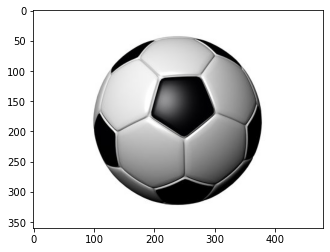

(440, 224, 224, 3)
(440,)


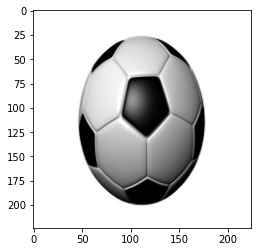

In [150]:
############################# images resizing (224,224,3)
plt.imshow(x_train[400])
plt.show()

resized_x_train = []
resized_x_test = []
resized_x_val = []

for i in range(len(x_train)):
    resized_x_train.append(cv2.resize(x_train[i], (224,224), interpolation = cv2.INTER_AREA))

for i in range(len(x_test)):
    resized_x_test.append(cv2.resize(x_test[i], (224,224), interpolation = cv2.INTER_AREA))
    
for i in range(len(x_val)):
    resized_x_val.append(cv2.resize(x_val[i], (224,224), interpolation = cv2.INTER_AREA))

resized_x_train = np.array(resized_x_train)
resized_x_test = np.array(resized_x_test)
resized_x_val = np.array(resized_x_val)

plt.imshow(resized_x_train[400])

print(resized_x_train.shape)
print(y_train.shape)

In [151]:
resized_x_train

array([[[[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[249, 249, 249],
         [249, 249, 249],
         [249, 249, 249],
         ...,
         [253, 253, 253],
         [253, 253, 253],
         [254, 254, 254]],

        [[249, 249, 249],
         [249, 249, 249],
         [249, 249, 249],
         ...,
         [253, 253, 253],
         [253, 253, 253],
         [254, 254, 254]],

        [[249, 249, 249],
         [249, 249, 249],
         [249, 249, 249],
         ...,
         [253, 253, 253],
        

In [152]:
y_train

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5

# Shuffle the Data

In [153]:
from sklearn.utils import shuffle
resized_x_train, y_train = shuffle(resized_x_train, y_train, random_state=42)
resized_x_test, y_test = shuffle(resized_x_test, y_test, random_state=42)
resized_x_val, y_val = shuffle(resized_x_val, y_val, random_state=42)

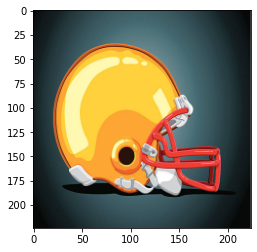

5


In [154]:
plt.imshow(resized_x_train[10])
plt.show()
print(y_train[10])

In [155]:
y_train

array([ 6,  1,  8,  6,  8,  7,  4,  2, 10, 10,  5,  1,  5,  9,  8,  1, 10,
        4,  1,  3,  0,  4,  0,  4,  2,  3,  1,  5, 10,  1,  7,  8,  3,  9,
        9,  1,  5,  2,  0,  5,  9,  3,  5,  1,  3,  0,  4,  7,  1,  9,  9,
        0,  3,  3,  0,  0,  7,  7,  1,  7,  3,  2,  7,  9,  7, 10,  0,  4,
       10,  2,  1,  9,  9,  6,  4,  3,  7,  0,  1,  2,  6,  2, 10,  1,  3,
        0,  0,  1,  6,  7,  0,  2,  7, 10,  2, 10, 10,  3,  9,  4,  7,  0,
        1, 10, 10,  9, 10,  0, 10,  2,  7,  0,  0,  9,  1,  8,  6,  1,  2,
        6,  5,  0,  3,  8,  6,  0,  0, 10,  9,  2,  8, 10,  2,  2, 10,  5,
        8,  8,  9,  4,  9,  3,  8,  5,  9, 10,  2,  9,  3,  5,  4,  4,  2,
        8,  4,  1, 10, 10,  2,  5,  6,  4,  6,  7,  4, 10,  8,  5,  0,  3,
        8,  6,  7,  9,  1,  2,  5,  5,  0,  7,  8,  3,  3,  4,  0,  6,  2,
        2,  6,  6,  4, 10, 10,  9,  9,  4,  4,  2,  5,  4,  9,  3,  0,  2,
        1,  7,  3,  8,  2,  3,  8,  9,  2,  8,  1,  0,  0,  3,  3,  6,  5,
        4,  1,  5,  8,  8

# Data Augmentation

(440, 224, 224, 3)
(440,)
(128, 224, 224, 3)
(128,)
******************* Augmented images *******************


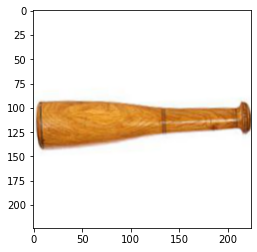

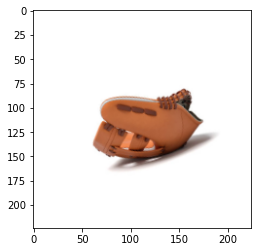

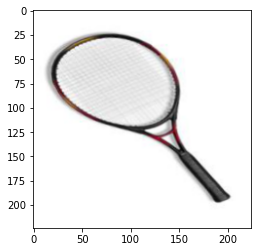

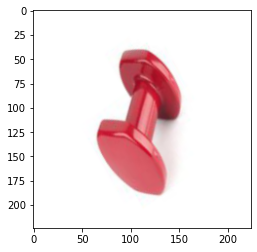

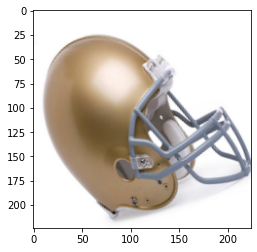

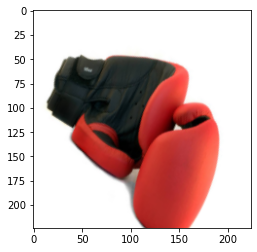

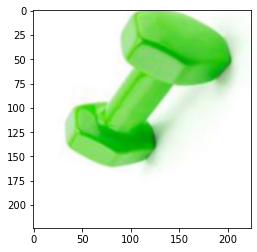

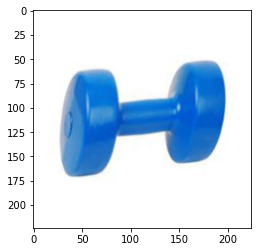

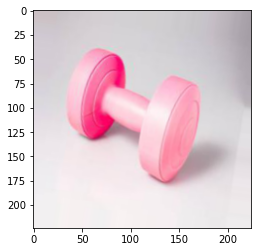

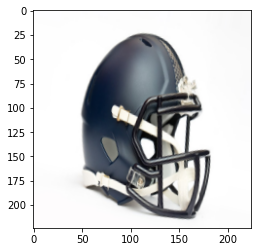

(568, 224, 224, 3)
(568,)
(128, 224, 224, 3)
(128,)
******************* Augmented images *******************


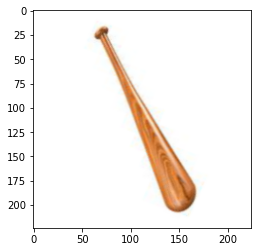

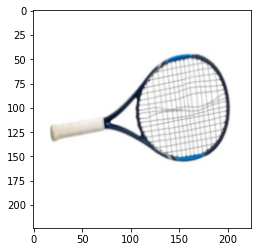

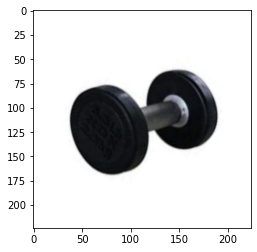

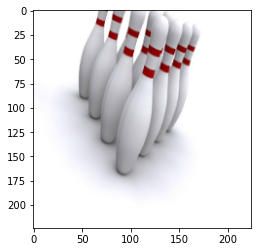

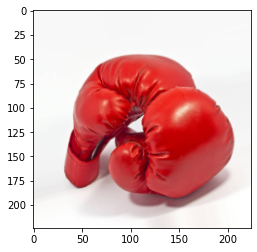

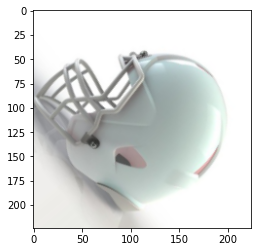

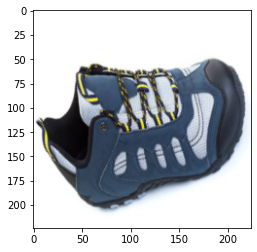

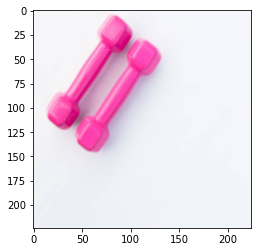

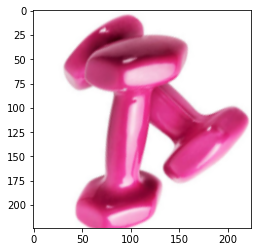

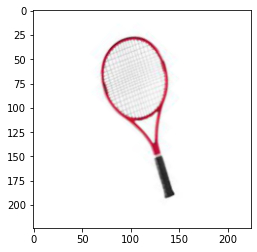

(696, 224, 224, 3)
(696,)
(128, 224, 224, 3)
(128,)
******************* Augmented images *******************


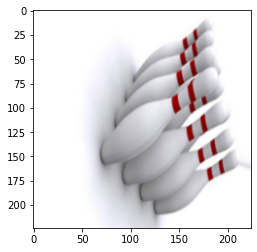

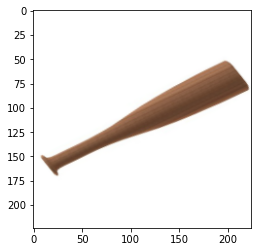

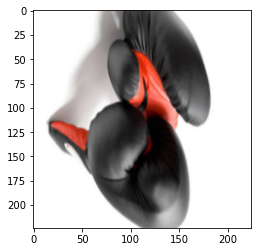

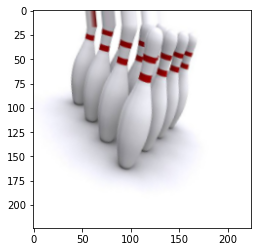

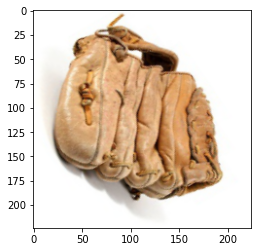

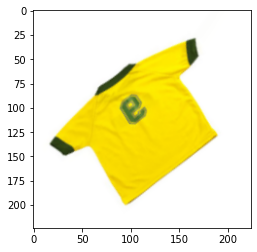

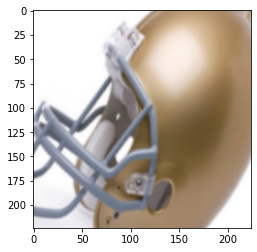

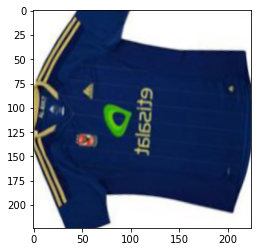

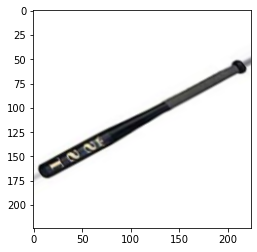

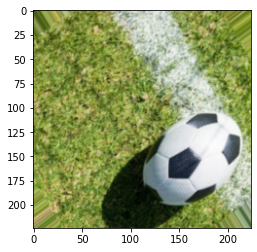

(824, 224, 224, 3)
(824,)
(128, 224, 224, 3)
(128,)
******************* Augmented images *******************


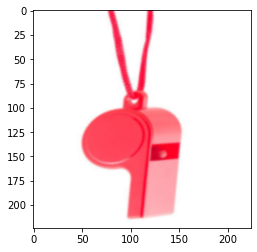

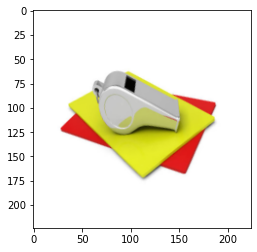

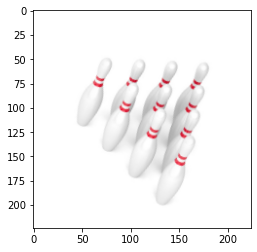

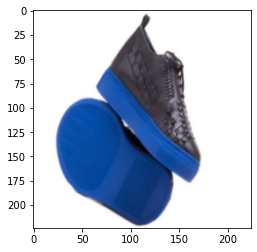

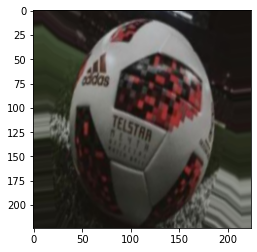

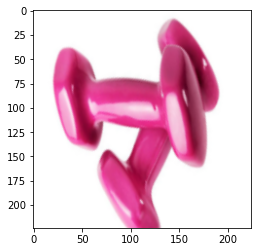

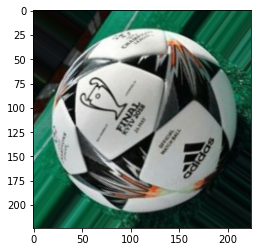

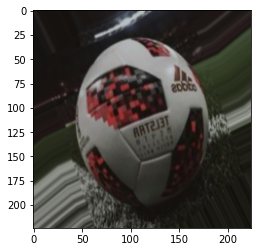

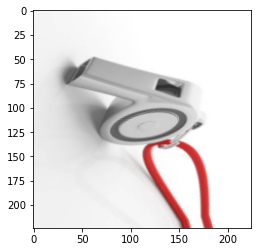

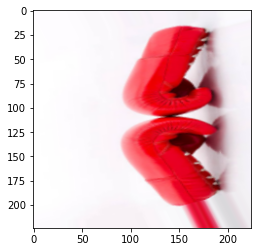

(952, 224, 224, 3)
(952,)
(128, 224, 224, 3)
(128,)
******************* Augmented images *******************


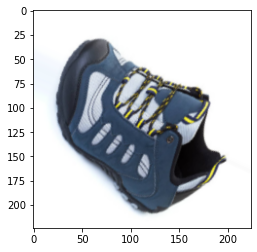

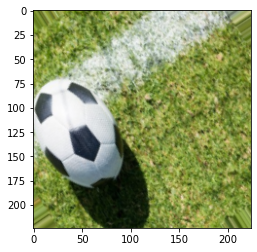

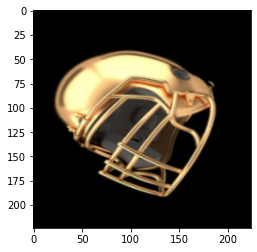

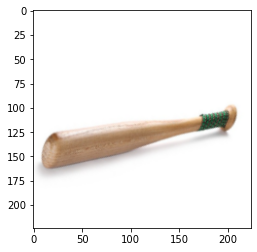

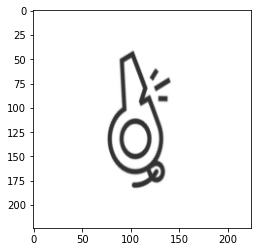

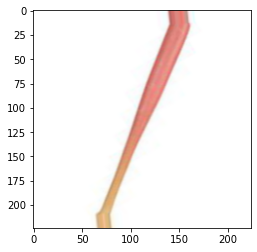

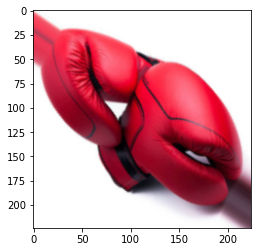

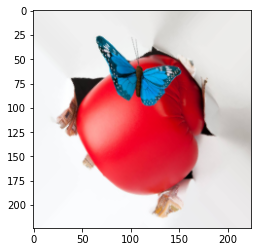

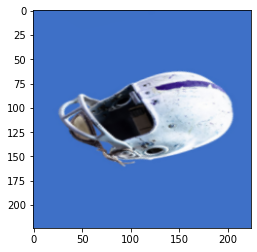

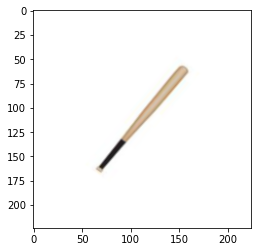

(1080, 224, 224, 3)
(1080,)


In [156]:
####################### Data Augmentation
Img_generator = ImageDataGenerator(rotation_range=90,shear_range=0.5, zoom_range=0.2, horizontal_flip=True)

print(resized_x_train.shape)
print(y_train.shape)

for i in range(5):
    iterator = Img_generator.flow(resized_x_train, y_train, batch_size=128)

    new_imgs_train = next(iterator)[0].astype("uint8")
    new_labels_train = next(iterator)[1].astype("uint8")

    print(new_imgs_train.shape)
    print(new_labels_train.shape)

    print("******************* Augmented images *******************")
    for i in range(10):
        plt.imshow(new_imgs_train[i])
        plt.show()

    resized_x_train = np.append(resized_x_train, new_imgs_train, axis = 0)
    y_train = np.append(y_train, new_labels_train, axis = 0)

    print(resized_x_train.shape)
    print(y_train.shape)

# Final data

In [157]:
print(resized_x_train.shape)
print(y_train.shape)

print(resized_x_test.shape)
print(y_test.shape)

print(resized_x_val.shape)
print(y_val.shape)

(1080, 224, 224, 3)
(1080,)
(55, 224, 224, 3)
(55,)
(55, 224, 224, 3)
(55,)


# First model ResNet 152 with 3 more layers
## Dense(2048, activation='relu')
## Dense(1024, activation='relu')
## Dense(512, activation='relu')

2022-11-15 18:00:17.498818: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 18:00:17.587837: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-11-15 18:00:17.587868: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-11-15 18:00:17.588292: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow bin

234698864/234698864 [==============================] - 7s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 2048)              58370944  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 11)                5643      
                                                       

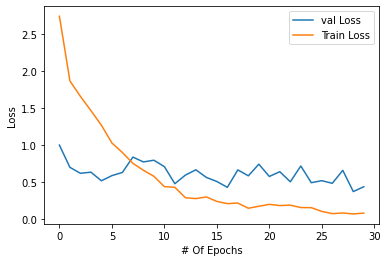

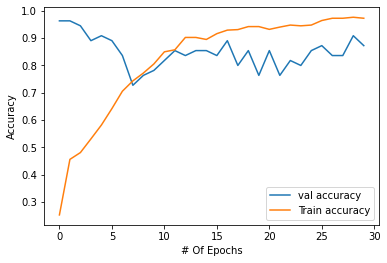

In [42]:
architecture = ResNet152(include_top=False, input_shape=(224,224,3), weights='imagenet', classes=11, pooling="avg")

####################### Freez all layers
for layer in architecture.layers:
    layer.trainable = False

model_resnet1 = keras.models.Sequential()
model_resnet1.add(architecture)
model_resnet1.add(Flatten())
model_resnet1.add(Dense(2048, activation='relu'))
model_resnet1.add(Dense(1024, activation='relu'))
model_resnet1.add(Dense(512, activation='relu'))
model_resnet1.add(Dense(11, activation='softmax'))

print(model_resnet1.summary())

model_resnet1.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
history_resnet = model_resnet1.fit(resized_x_train, y_train, epochs=30, batch_size = 64, validation_data=[resized_x_val, y_val])

loss_training = history_resnet.history['loss']
loss_test = history_resnet.history['val_loss']

accuracy_training = history_resnet.history['accuracy']
accuracy_test = history_resnet.history['val_accuracy']

####################### Plotting
plt.plot(loss_test)
plt.plot(loss_training)
plt.xlabel("# Of Epochs")
plt.ylabel("Loss")
plt.legend(['val Loss', 'Train Loss'])
plt.show()

plt.plot(accuracy_test)
plt.plot(accuracy_training)
plt.xlabel("# Of Epochs")
plt.ylabel("Accuracy")
plt.legend(['val accuracy', 'Train accuracy'])
plt.show()

In [117]:
def ConfusionMatrix(Y_Actual, Y_Pred):
    CF = confusion_matrix(Y_Actual, Y_Pred)
    return CF

# to Plot Confusion Matrix
def PLOT_ConfusionMatrix(CF,Title):
    sns.heatmap(CF, annot=True, fmt='d')
    plt.title(Title, fontsize = 15)
    plt.xlabel('Predicted', fontsize = 15)
    plt.ylabel('Actual', fontsize = 15)
    return plt.show()

2/2 [==============================] - 6s 3s/step


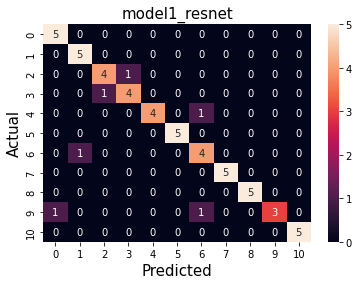

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.83      1.00      0.91         5
           2       0.80      0.80      0.80         5
           3       0.80      0.80      0.80         5
           4       1.00      0.80      0.89         5
           5       1.00      1.00      1.00         5
           6       0.67      0.80      0.73         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      0.60      0.75         5
          10       1.00      1.00      1.00         5

    accuracy                           0.89        55
   macro avg       0.90      0.89      0.89        55
weighted avg       0.90      0.89      0.89        55



In [119]:
y_pred1 = np.argmax(model_resnet1.predict(resized_x_test), axis=1)
cm1 = ConfusionMatrix(y_test, y_pred1)
PLOT_ConfusionMatrix(cm1,"model1_resnet")
model_resnet1_report = classification_report(y_test, y_pred1)
print(model_resnet1_report)

# Second model (ResNet152 with some changes in the previous architecture)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 2048)              58370944  
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_15 (Dense)            (None, 2048)              4196352   
                                                                 
 batch_normalization_9 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 2048)              0         
                                                                 
 dense_16 (Dense)            (None, 1024)              2098176   
                                                      

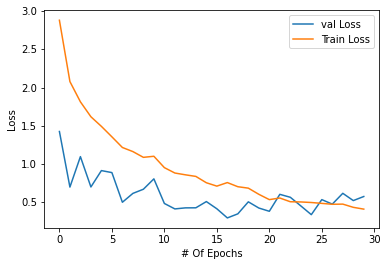

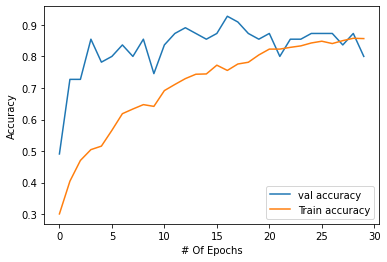

In [162]:
architecture = ResNet152(include_top=False, input_shape=(224,224,3), weights='imagenet', classes=11, pooling="avg")

####################### Freez all layers
for layer in architecture.layers:
    layer.trainable = False

model_resnet2 = keras.models.Sequential()
model_resnet2.add(architecture)
model_resnet2.add(Flatten())
model_resnet2.add(Dense(2048, activation='relu'))
model_resnet2.add(BatchNormalization())
model_resnet2.add(Dropout(0.5))

model_resnet2.add(Dense(1024, activation='relu'))
model_resnet2.add(BatchNormalization())
model_resnet2.add(Dropout(0.3))

model_resnet2.add(Dense(512, activation='relu'))
model_resnet2.add(BatchNormalization())
model_resnet2.add(Dropout(0.2))

model_resnet2.add(Dense(11, activation='softmax'))
print(model_resnet2.summary())

model_resnet2.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
history_resnet = model_resnet2.fit(resized_x_train, y_train, epochs=30, batch_size = 64, validation_data=[resized_x_val, y_val])

loss_training = history_resnet.history['loss']
loss_test = history_resnet.history['val_loss']

accuracy_training = history_resnet.history['accuracy']
accuracy_test = history_resnet.history['val_accuracy']

####################### Plotting
plt.plot(loss_test)
plt.plot(loss_training)
plt.xlabel("# Of Epochs")
plt.ylabel("Loss")
plt.legend(['val Loss', 'Train Loss'])
plt.show()

plt.plot(accuracy_test)
plt.plot(accuracy_training)
plt.xlabel("# Of Epochs")
plt.ylabel("Accuracy")
plt.legend(['val accuracy', 'Train accuracy'])
plt.show()

2/2 [==============================] - 9s 3s/step


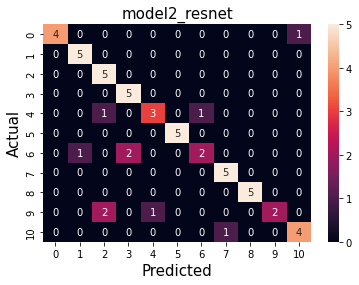

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.83      1.00      0.91         5
           2       0.62      1.00      0.77         5
           3       0.71      1.00      0.83         5
           4       0.75      0.60      0.67         5
           5       1.00      1.00      1.00         5
           6       0.67      0.40      0.50         5
           7       0.83      1.00      0.91         5
           8       1.00      1.00      1.00         5
           9       1.00      0.40      0.57         5
          10       0.80      0.80      0.80         5

    accuracy                           0.82        55
   macro avg       0.84      0.82      0.80        55
weighted avg       0.84      0.82      0.80        55



In [163]:
y_pred2 = np.argmax(model_resnet2.predict(resized_x_test), axis=1)
cm2 = ConfusionMatrix(y_test, y_pred2)
PLOT_ConfusionMatrix(cm2,"model2_resnet")
model_resnet2_report = classification_report(y_test, y_pred2)
print(model_resnet2_report)

# Best Model (first model) Results Visualizations

55
(55, 2048)


/srv/conda/envs/saturn/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/srv/conda/envs/saturn/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


2/2 [==============================] - 6s 3s/step
(55,)


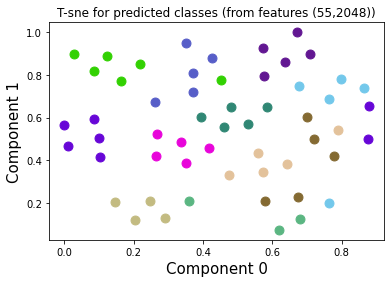

################ T-sne for predicted classes (from features (55,2048)) ################


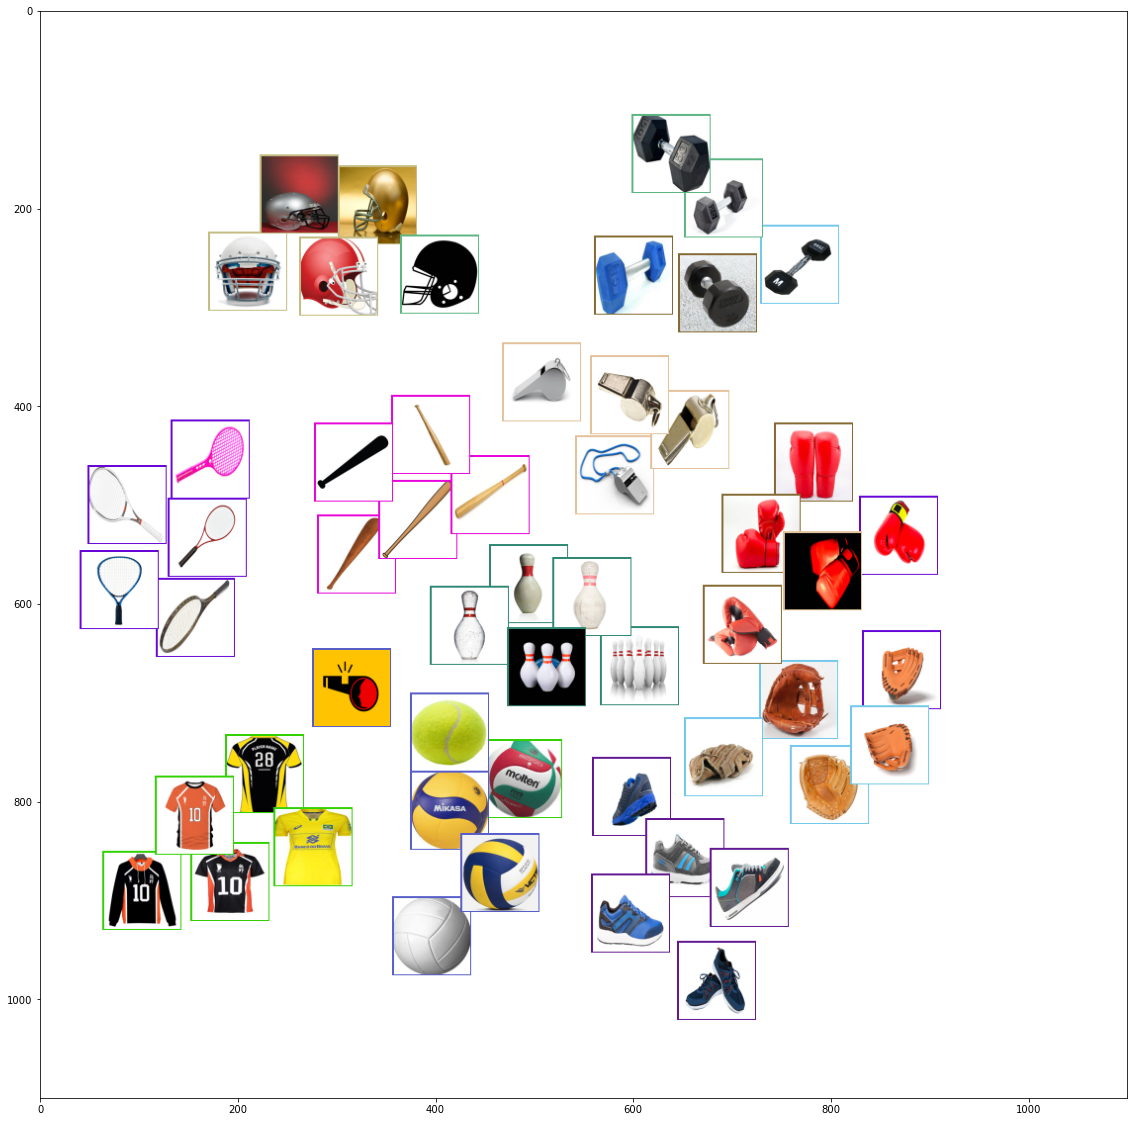

In [161]:
######################################## t-SNE
from sklearn.manifold import TSNE
import random
import string

random.seed(42)

########################################
layers = architecture.layers
a_list = list(range(1, len(layers)))
model_output = [architecture.layers[i].output for i in a_list]
model = Model(inputs=architecture.inputs, outputs=model_output)

features = []
for i in range(len(resized_x_test)):
    img = np.expand_dims(resized_x_test[i], axis = 0)
    feature_maps = model.predict(img, verbose=0)
    type(feature_maps)
    # print(feature_maps[len(layers)-2].shape)
    features.append(feature_maps[len(layers)-2])

print(len(features))
features = np.asarray(features)
features = np.vstack(features)
print(features.shape)

#######################################################################
def GetListOfClasses(numberOfClasses, DataSet, TargetColumn):
        ls = [None] * numberOfClasses
        for i in range(0,numberOfClasses):
            ls[i] = DataSet.loc[DataSet[TargetColumn] == i]
        return ls

colorsOptions = []
Labels = []
letters = ["0","1","2","3","4","5","6","7","8","9","a","b","c","d","e","f"]
for j in range(11):
    Labels.append(j)
    colorsOptions.append(''.join(random.choice(letters) for i in range(6)))
    colorsOptions[j] = '#' + colorsOptions[j]
                     
def PlotDataPoints(numberOfClasses,colorsOpt ,ListOFClasses, XLabel, Ylabel ,labels ,S, Title):
    MarkersOptions = ['o']
    
    for i in range(numberOfClasses):
        plt.scatter(x = ListOFClasses[i].iloc[:, 0:1], y = ListOFClasses[i].iloc[:, 1:2], c=colorsOpt[i], marker = MarkersOptions[0], s=S, label = labels[i])

    plt.xlabel(XLabel, fontsize = 15)
    plt.ylabel(Ylabel, fontsize = 15)
    plt.title(Title)
    #plt.legend()
    return plt

def t_sne_Scaling(tsne):
    value_range = (np.max(tsne) - np.min(tsne))
    starts_from_zero = tsne - np.min(tsne)
    return starts_from_zero / value_range

tsne1 = TSNE(n_components=2).fit_transform(features)
tsne1 = t_sne_Scaling(tsne1)

y_pred = model_resnet1.predict(resized_x_test)
y_pred = np.argmax(y_pred, axis = 1)
print(y_pred.shape)

tsne_features = pd.concat([pd.DataFrame(tsne1), pd.DataFrame(y_pred)],axis=1 , ignore_index = True).astype(float)
listOfclasses1 = GetListOfClasses(11, tsne_features , pd.DataFrame(tsne_features).columns[2])

PlotDataPoints(11, colorsOptions, listOfclasses1, 'Component 0', 'Component 1' ,Labels ,80, 'T-sne for predicted classes (from features (55,2048))').show()

####################################################### t-sne for Images
def hex_to_rgb(hex):
  return tuple(int(hex[i:i+2], 16) for i in (0, 2, 4))

rgb_colors = []
for i in range(len(colorsOptions)):
    rgb_colors.append(hex_to_rgb(colorsOptions[i][1:]))
    
temp = []

for i in range(len(resized_x_test)):
    temp.append(cv2.resize(resized_x_test[i], (80,80), interpolation = cv2.INTER_AREA))
    temp[i] = cv2.rectangle(temp[i], (0,0), (80,80), rgb_colors[y_pred[i]], 2)

temp = np.array(temp)
    
def image_coordinates(image, x_tsne, y_tsne):
    center_x = int(30*30*x_tsne) + int(x_tsne+y_tsne)
    center_y = int(30*30*y_tsne) + int(x_tsne+y_tsne)
    x1 = center_x + int(80 / 2)
    y1 = center_y + int(80 / 2)
    x2 = x1 + 80
    y2 = y1 + 80
    return x1, y1, x2, y2

tsne_grid1 = 255 * np.ones((1100, 1100, 3), np.uint8)

for i in range(len(temp)):
    x1, y1, x2, y2 = image_coordinates(temp[i], tsne1[i][0], tsne1[i][1])
    tsne_grid1[y1:y2, x1:x2, :] = temp[i].copy()
    
print('################ T-sne for predicted classes (from features (55,2048)) ################')
plt.figure(figsize=(20,20))
plt.imshow(tsne_grid1)
plt.show()